<a href="https://colab.research.google.com/github/claudevandort/UAI-DeepLearning/blob/master/01_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensores

In [ ]:
import torch
import numpy as np

In [ ]:
x = torch.empty(1)
print(x)

x = torch.empty(3)
print(x)

x = torch.empty(2,3)
print(x)

x = torch.empty(2, 2, 3)
print(x)

tensor([-7.3630e-26])
tensor([-3.9882e-26,  3.0960e-41,  9.7217e-01])
tensor([[-7.3625e-26,  3.0960e-41,  9.7217e-01],
        [ 6.2552e-01,  9.8613e-01,  7.9313e-01]])
tensor([[[-7.3629e-26,  3.0960e-41,  9.7217e-01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]]])


In [ ]:
# tensor desde lista
t1 = torch.tensor([[1,2], [3,4], [5,6]])
print(t1)
print(t1.shape)

# tensor desde numpy
t2 = torch.tensor(np.array([1,2,3,4]))
print(t2)

#tensor aleatorio
t3 = torch.rand(2,3)
print(t3)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])
tensor([1, 2, 3, 4])
tensor([[0.3967, 0.0996, 0.9609],
        [0.6875, 0.1783, 0.5278]])


In [ ]:
# accediendo al tensor
print(t1.size())
print(t1[1])
print(t1[1][1])

torch.Size([3, 2])
tensor([3, 4])
tensor(4)


In [ ]:
# usando CUDA
print(torch.cuda.is_available())
if torch.cuda.is_available():
  device = torch.cuda.current_device()
  print(device)
  print(torch.cuda.get_device_name(device))

True
0
Tesla T4


In [ ]:
# CPU vs GPU
# CPU
%%time

for i in range(500):
  x = torch.randn(1000, 1000)
  y = torch.randn(1000, 1000)
  z = torch.matmul(x, y)

CPU times: user 20.3 s, sys: 54.6 ms, total: 20.4 s
Wall time: 20.4 s


In [ ]:
# GPU
%%time

cuda0 = torch.device('cuda:0')
for i in range(500):
  x = torch.randn(1000, 1000, device=cuda0)
  y = torch.randn(1000, 1000, device=cuda0)
  z = torch.matmul(x, y)

CPU times: user 78.4 ms, sys: 110 ms, total: 189 ms
Wall time: 194 ms


# Regresión Lineal

Se realiza el cálculo de una regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

omo ejemplo utilizaremos base de datos muy simple. La hipótesis será lineal:

$$y = \theta_0 \cdot x$$

Sin intercepto o _bias_ para simplificar el problema y explicarlo con claridad.

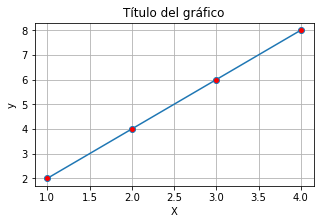

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

plt.plot(X, y, marker='o', markerfacecolor='red')
plt.title("Título del gráfico")
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

## Usando descenso de gradiente

Para calcular una regresión lineal utilizando descenso de gradientedebemos contar con lo siguiente:

* **Hipótesis**: Función lineal para el ejemplo de nuestra hipótesis será: $$\hat{y}=\theta_0 \cdot x$$ Es la función que hace la predicción una vez que fueron aprendidos los parámetros, también se denota como: $$\hat{y}=h_\theta(x)$$
* **Función de pérdida**: Error cuadrático medio (MSE, mean squared error), $$l(y,\hat{y})=\frac{1}{N}\cdot (y -\hat{y})^2$$

* **Derivada de la función de pérdida**: $$\frac{dl}{d\theta_0} = \frac{1}{N}\cdot 2x(\theta_0 x - y)$$

In [ ]:
# Inicializo los thetas
W = 0.0

# Hipótesis: Lineal (f(x)=w*x)
def forward(x):
  return W * x

# Loss: MSE
def loss(y, y_pred):
  return ((y - y_pred) ** 2).mean()

# Gradiente
# L = MSE = 1/N * (W*x - y) ** 2
# dL/dW = 1/N * 2*(W*x - y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

print(f'Predicción antes de entrenar: f(5) = {forward(5):.3f}')

Predicción antes de entrenar: f(5) = 0.000


In [ ]:
learning_rate = 0.01
n_iter = 20

for epoch in range(n_iter):
  # Predicción
  y_pred = forward(X)

  # Error
  l = loss(y, y_pred)

  # Cálculo de gradientes
  dw = gradient(X, y, y_pred)

  # Actualizar los pesos
  W = W - learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: W = {W:.3f}, loss = {l:.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5):.3f}')

epoch 1: W = 1.200, loss = 30.00000000
epoch 3: W = 1.872, loss = 0.76800019
epoch 5: W = 1.980, loss = 0.01966083
epoch 7: W = 1.997, loss = 0.00050331
epoch 9: W = 1.999, loss = 0.00001288
epoch 11: W = 2.000, loss = 0.00000033
epoch 13: W = 2.000, loss = 0.00000001
epoch 15: W = 2.000, loss = 0.00000000
epoch 17: W = 2.000, loss = 0.00000000
epoch 19: W = 2.000, loss = 0.00000000
Predicción después de entrenar: f(5) = 10.000


## Descenso gradiente con PyTorch

In [ ]:
import torch

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
W = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
  return x * W

def loss(y, y_pred):
  return ((y_pred - y) ** 2).mean()

print(f'Prediccion antes del entrenamiento: f(5) = {forward(5).item():.3f}')

Prediccion antes del entrenamiento: f(5) = 0.000


In [ ]:
learning_rate = 0.02
n_iter = 30

for epoch in range(n_iter):
  y_pred = forward(X)
  l = loss(y, y_pred)
  l.backward()
  with torch.no_grad():
    W -= learning_rate * W.grad
  W.grad.zero_()
  if epoch % 3 == 0:
    print(f'epoch {epoch}: w = {W.item():.3f}, loss = {l.item():.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5).item():.3f}')

epoch 0: w = 1.734, loss = 1.08300066
epoch 3: w = 1.909, loss = 0.12741381
epoch 6: w = 1.969, loss = 0.01499011
epoch 9: w = 1.989, loss = 0.00176358
epoch 12: w = 1.996, loss = 0.00020749
epoch 15: w = 1.999, loss = 0.00002441
epoch 18: w = 2.000, loss = 0.00000287
epoch 21: w = 2.000, loss = 0.00000034
epoch 24: w = 2.000, loss = 0.00000004
epoch 27: w = 2.000, loss = 0.00000000
Predicción después de entrenar: f(5) = 10.000


## Entrenamiento con PyTorch

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def gradient_descent(X, y, iters=10):
  n_samples, n_features = X.shape
  
  # Defino la hipotesis
  input_size = n_features
  output_size = 1
  model = nn.Linear(input_size, output_size)

  # Función de pérdida y parámetros del optimizador
  learning_rate = 0.01
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # Entrenamiento
  num_epochs = iters
  for epoch in range(num_epochs):
    # Calcular predicción
    y_pred = model(X)
    l = criterion(y_pred, y)

    # Actualizar el modelo
    l.backward()
    optimizer.step()

    # Dejar los gradientes en cero
    optimizer.zero_grad()

    if epoch % 2 == 0:
      print(f'epoch {epoch}:  loss = {l.item():.8f}')
  
  return model

def plot_fit(X_numpy, y_numpy, y_pred):
  plt.plot(X_numpy, y_numpy, 'ro', label='$Y_{real}$')
  plt.plot(X_numpy, y_pred, 'bo', label='$Y_{estimado}$')
  plt.xlabel('X - Variable Independiente')
  plt.ylabel('Y - Variable Dependiente')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()

## Visualización del descenso de gradiente

epoch 0:  loss = 3484.87207031


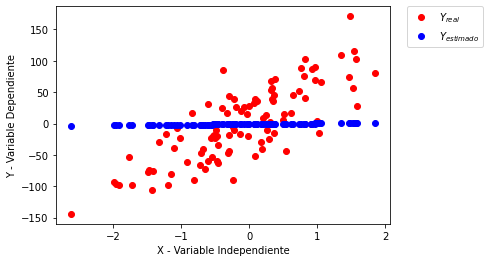

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Cargar datos
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=42)

# Convertir a tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

# Entrenar
model = gradient_descent(X, y, iters=1)

# Predecir
predicted = model(X).detach().numpy()

# Graficar
plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 3475.93115234
epoch 2:  loss = 3333.97192383
epoch 4:  loss = 3201.17553711


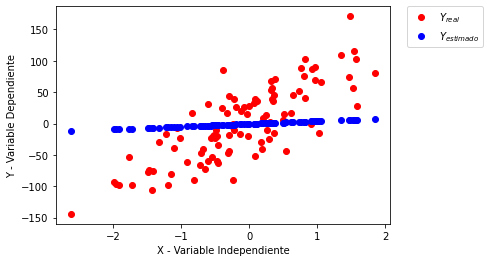

In [ ]:
model = gradient_descent(X, y, iters=5)
predicted = model(X).detach().numpy()
plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 3531.90185547
epoch 2:  loss = 3385.20190430
epoch 4:  loss = 3248.06054688
epoch 6:  loss = 3119.84570312
epoch 8:  loss = 2999.96630859
epoch 10:  loss = 2887.87182617
epoch 12:  loss = 2783.04882812
epoch 14:  loss = 2685.01782227
epoch 16:  loss = 2593.33227539
epoch 18:  loss = 2507.57519531


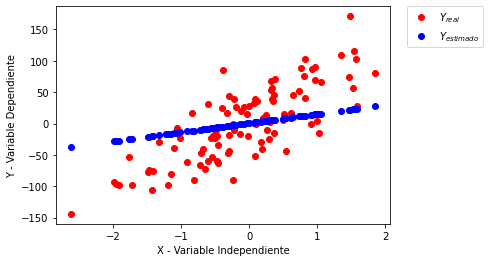

In [ ]:
model = gradient_descent(X, y, iters=20)
predicted = model(X).detach().numpy()
plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 3510.96850586
epoch 2:  loss = 3366.56616211
epoch 4:  loss = 3231.50073242
epoch 6:  loss = 3105.15771484
epoch 8:  loss = 2986.96679688
epoch 10:  loss = 2876.39355469
epoch 12:  loss = 2772.93945312
epoch 14:  loss = 2676.13940430
epoch 16:  loss = 2585.56030273
epoch 18:  loss = 2500.79614258
epoch 20:  loss = 2421.46850586
epoch 22:  loss = 2347.22363281
epoch 24:  loss = 2277.73193359
epoch 26:  loss = 2212.68505859
epoch 28:  loss = 2151.79443359
epoch 30:  loss = 2094.79101562
epoch 32:  loss = 2041.42431641
epoch 34:  loss = 1991.45861816
epoch 36:  loss = 1944.67456055
epoch 38:  loss = 1900.86755371
epoch 40:  loss = 1859.84533691
epoch 42:  loss = 1821.42895508
epoch 44:  loss = 1785.45092773
epoch 46:  loss = 1751.75439453
epoch 48:  loss = 1720.19360352
epoch 50:  loss = 1690.63122559
epoch 52:  loss = 1662.93969727
epoch 54:  loss = 1636.99890137
epoch 56:  loss = 1612.69714355
epoch 58:  loss = 1589.92968750
epoch 60:  loss = 1568.59875488
epoch 62:  lo

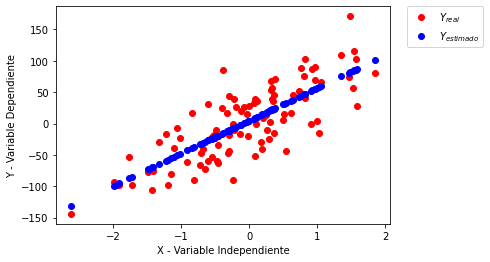

In [ ]:
model = gradient_descent(X, y, iters=300)
predicted = model(X).detach().numpy()
plot_fit(X_numpy, y_numpy, predicted)